In [1]:
library(brms) #predictability: Double hierearchical model
library(MCMCglmm) #HPDinterval
library(dplyr) #%>%
library(lmerTest) #lmer
#library(MuMIn) #r2
#library(merTools) #sim

Warning message:
"le package 'brms' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : Rcpp

Warning message:
"le package 'Rcpp' a été compilé avec la version R 4.1.2"
Loading 'brms' package (version 2.16.3). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attachement du package : 'brms'


L'objet suivant est masqué depuis 'package:stats':

    ar


Warning message:
"le package 'MCMCglmm' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : Matrix

Warning message:
"le package 'Matrix' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : coda

Warning message:
"le package 'coda' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : ape

Warning message:
"le package 'ape' a été compilé avec la version R 4.1.2"

Attachement du package : 'MCMCglmm'


L'objet suivant est masqué depuis 'pac

In [31]:
library(parallel)
my.cores = detectCores()-1 #minus 1 to avoid bocking the computer
my.cores

[1] 11

In [4]:
#df[rowSums(is.na(df)) > 0,]

# Behaviorual syndrome

,TRAN
OFH,0
TRAN,1


,OFH
TRAN,0
OFH,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


,MEXP,NewAfterEpi,REXP
LEXP,0,0,0
MEXP,1,0,0
NewAfterEpi,0,1,0
REXP,0,0,1


[1] 4966   30


        level           DOA             DIB                FoodPenID   
 2021-01-11: 156   Min.   :179.0   Min.   : 61.0   FoodPenID1-4 :1182  
 2021-01-17: 156   1st Qu.:222.0   1st Qu.:104.0   FoodPenID5-8 :1246  
 2021-04-18: 156   Median :279.0   Median :161.0   FoodPenID9-12:2538  
 2021-01-24: 155   Mean   :283.4   Mean   :165.4                       
 2021-05-23: 155   3rd Qu.:338.0   3rd Qu.:220.0                       
 2021-01-05: 154   Max.   :410.0   Max.   :292.0                       
 (Other)   :4034                                                       
   BS_type          Treatment           CLASS          PenID     
 Length:4966        TRAN:2491   LEXP       : 894   pen5   : 659  
 Class :character   OFH :2475   MEXP       :1140   pen11  : 648  
 Mode  :character               NewAfterEpi:1513   pen10  : 647  
                                REXP       :1419   pen4   : 646  
                                                   pen9   : 632  
                            

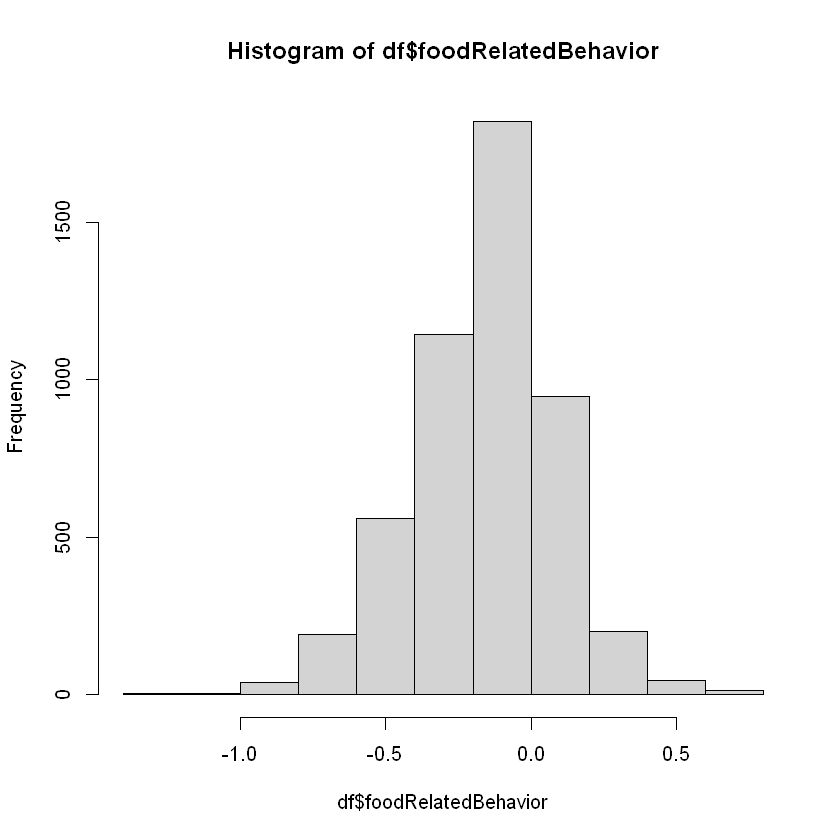

[1] 4966   44

[1] 3143   44

[1] 457  44

[1] 444  44

[1] 463  44

[1] 459  44

[1] 603  44

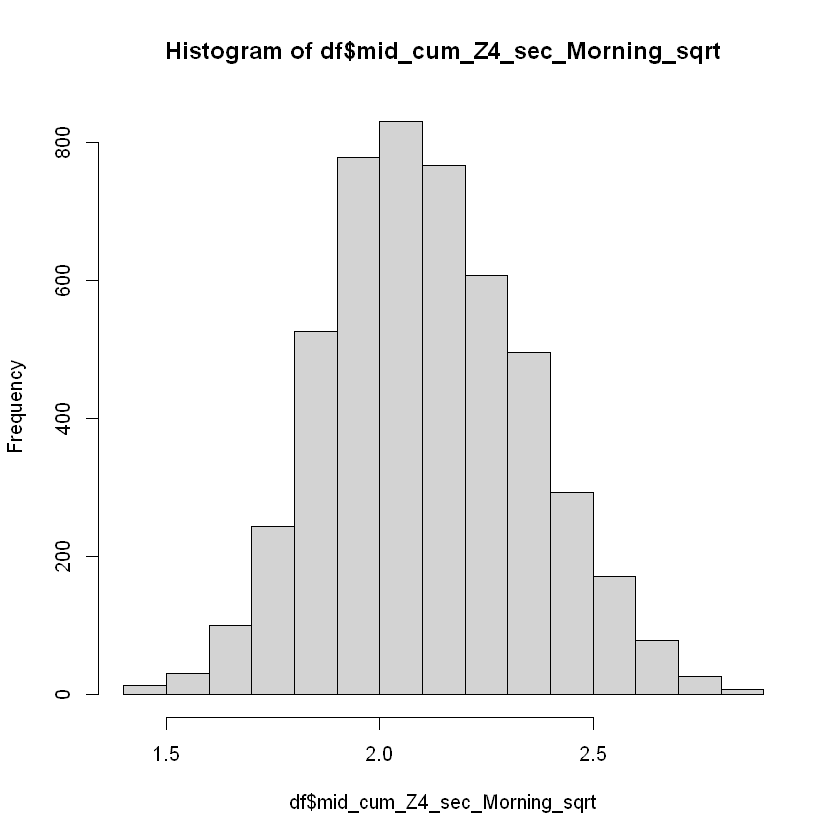

In [28]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
#df = read.csv(file.path(path_,'df_daily_aggregatedHA.csv'), header = TRUE, sep = ",")
df = read.csv(file.path(path_,'df_BS.csv'), header = TRUE, sep = ",")

df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID)
df$level = as.factor(df$level) 
df$FoodPenID = as.factor(df$FoodPenID) 

#df$WOA_F = as.factor(df$WOA) 

df$CLASS = as.factor(df$CLASS) 
df$Treatment = as.factor(df$Treatment)

#scale: mean-centering of the environmental variable so that intercepts reflect average values for the HenID and ind. 
#df$temperature_C_avg_scale = scale(df$temperature_C_avg, center=TRUE, scale=TRUE)

#setting reference group
contrasts(df$Treatment)
df <- df %>% mutate(Treatment = relevel(Treatment, ref = "TRAN"))
contrasts(df$Treatment)

contrasts(df$CLASS)
df <- df %>% mutate(CLASS = relevel(CLASS, ref = "LEXP"))
contrasts(df$CLASS)
print(dim(df))
summary(df)

df$latency_1_Zone_mn_6hOPP = max(df$latency_1_Zone_mn_6h)-df$latency_1_Zone_mn_6h
df$food_related_behavior_final_inv_cst = (-1)*(df$food_related_behavior_final)+1.01
df$latency_1_Zone_15mn_6h = as.integer(df$latency_1_Zone_mn_6h/15)
df$latency_1_Zone_15mn_6hOPP = max(df$latency_1_Zone_15mn_6h) - df$latency_1_Zone_15mn_6h

df$latency_1_Zone_15mn_3h = as.integer(df$latency_1_Zone_mn_3h/15)
df$latency_1_Zone_15mn_3hOPP = max(df$latency_1_Zone_15mn_3h) - df$latency_1_Zone_15mn_3h
df$latency_1_Zone_15mn_3h_bind = with(df, cbind(latency_1_Zone_15mn_3h, latency_1_Zone_15mn_3hOPP))
df$size = with(df, latency_1_Zone_15mn_3h + latency_1_Zone_15mn_3hOPP)


#Parameter names should not contain dots or underscores.
df$VTD = df$vertical_travel_distance_fulllight_perinsideh
df$KBFInterp = df$KBF_interp
df$weightInterp = df$weight_interp
df$SleepingNotUppest = df$Sleeping_NotUppest

#Parameter names should not contain dots or underscores.
df$VTD = df$vertical_travel_distance_fulllight_perinsideh
df$KBFInterp = df$KBF_interp
df$weightInterp = df$weight_interp
df$SleepingNotUppest = df$Sleeping_NotUppest
df$foodRelatedBehavior = log(df$food_related_behavior_final_inv_cst)
hist(df$foodRelatedBehavior)
df$mid_cum_Z4_sec_Morning_sqrt = sqrt(df$mid_cum_Z4_sec_Morning)
hist(df$mid_cum_Z4_sec_Morning_sqrt)

dim(df)
df_time = df[df$BS_type=='time',]
dim(df_time)

df_LP2 = df[df$BS_type=='LP2',]
dim(df_LP2)

df_LP10 = df[df$BS_type=='LP10',]
dim(df_LP10)

df_cold = df[df$BS_type=='cold',]
dim(df_cold)

df_vacc = df[df$BS_type=='TypicalVaccinationDay',]
dim(df_vacc)

df_AC = df[df$across_context==1,]
dim(df_AC)

head(df_time,3)

In [29]:
head(df_time,3)

,level,DOA,DIB,FoodPenID,BS_type,Treatment,CLASS,PenID,temperature_C_avg,HenID_WIB,...,latency_1_Zone_15mn_3h,latency_1_Zone_15mn_3hOPP,latency_1_Zone_15mn_3h_bind,size,VTD,KBFInterp,weightInterp,SleepingNotUppest,foodRelatedBehavior,mid_cum_Z4_sec_Morning_sqrt
,<fct>,<int>,<int>,<fct>,<chr>,<fct>,<fct>,<fct>,<dbl>,<chr>,...,<int>,<int>,"<int[,2]>",<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
4,2020-12-20,200,82,FoodPenID9-12,time,TRAN,REXP,pen10,5.5000000,hen_131-WIB12,...,12,0,"12, 0",12,5.288128,0.000000,1802.650,0,-0.5363137,2.141715
7,2021-01-03,214,96,FoodPenID9-12,time,TRAN,REXP,pen10,0.8333333,hen_131-WIB14,...,9,3,"9, 3",12,7.312166,0.000000,1839.283,0,-0.2227852,1.971181
10,2021-01-17,228,110,FoodPenID9-12,time,TRAN,REXP,pen10,1.8333333,hen_131-WIB16,...,12,0,"12, 0",12,6.392746,5.571429,1850.211,0,-0.3149193,2.296193


# Predictability and mean

In [9]:
#such a correlation can give insights whether certain behavioral types are particularlypredictable or un-predictable in their behavior
double_model_cor = bf(scale(VTD) ~ Treatment + scale(weightInterp)+scale(KBFInterp)+scale(DIB)+scale(I(DIB^2)) +(1|a|HenID),
                      sigma~(1|a|HenID))
m3_brm_cor = brm(double_model_cor, data = df_time,warmup = 500,iter = 3000,thin=2,chains = 2,inits  = "random",
                 seed = 12345,cores  = my.cores)
summary(m3_brm_cor)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = log 
Formula: scale(VTD) ~ Treatment + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + scale(I(DIB^2)) + (1 | a | HenID) 
         sigma ~ (1 | a | HenID)
   Data: df_time (Number of observations: 3143) 
  Draws: 2 chains, each with iter = 1500; warmup = 250; thin = 2;
         total post-warmup draws = 1250

Group-Level Effects: 
~HenID (Number of levels: 190) 
                               Estimate Est.Error l-95% CI u-95% CI Rhat
sd(Intercept)                      0.83      0.05     0.75     0.92 1.00
sd(sigma_Intercept)                0.34      0.03     0.30     0.39 1.00
cor(Intercept,sigma_Intercept)     0.61      0.06     0.48     0.72 1.00
                               Bulk_ESS Tail_ESS
sd(Intercept)                       407      783
sd(sigma_Intercept)                1461     1952
cor(Intercept,sigma_Intercept)     1281     1785

Population-Level Effects: 
                  Estimate Est.Error l-95% CI u-95% CI Rhat Bu

In [12]:
#such a correlation can give insights whether certain behavioral types are particularlypredictable or un-predictable in their behavior
double_model_cor = bf(scale(foodRelatedBehavior) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB) +(1|a|HenID),
                      sigma~(1|a|HenID))
m3_brm_cor = brm(double_model_cor, data = df_time,warmup = 500,iter = 3000,thin=2,chains = 2,inits  = "random",
                 seed = 12345, cores=my.cores)
summary(m3_brm_cor)

Compiling Stan program...

Start sampling



 Family: gaussian 
  Links: mu = identity; sigma = log 
Formula: scale(foodRelatedBehavior) ~ Treatment + FoodPenID + scale(weightInterp) + scale(KBFInterp) + scale(DIB) + (1 | a | HenID) 
         sigma ~ (1 | a | HenID)
   Data: df_time (Number of observations: 3143) 
  Draws: 2 chains, each with iter = 1500; warmup = 250; thin = 2;
         total post-warmup draws = 1250

Group-Level Effects: 
~HenID (Number of levels: 190) 
                               Estimate Est.Error l-95% CI u-95% CI Rhat
sd(Intercept)                      0.65      0.04     0.58     0.72 1.00
sd(sigma_Intercept)                0.34      0.02     0.29     0.39 1.00
cor(Intercept,sigma_Intercept)    -0.24      0.09    -0.40    -0.06 1.00
                               Bulk_ESS Tail_ESS
sd(Intercept)                       911     1369
sd(sigma_Intercept)                1324     1682
cor(Intercept,sigma_Intercept)     1229     1845

Population-Level Effects: 
                       Estimate Est.Error l-95% CI u